In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('fraudTrain.csv')

In [73]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170849 entries, 0 to 170848
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             170849 non-null  int64  
 1   trans_date_trans_time  170849 non-null  object 
 2   cc_num                 170849 non-null  int64  
 3   merchant               170849 non-null  object 
 4   category               170849 non-null  object 
 5   amt                    170849 non-null  float64
 6   first                  170849 non-null  object 
 7   last                   170849 non-null  object 
 8   gender                 170849 non-null  object 
 9   street                 170849 non-null  object 
 10  city                   170849 non-null  object 
 11  state                  170849 non-null  object 
 12  zip                    170849 non-null  int64  
 13  lat                    170849 non-null  float64
 14  long                   170849 non-nu

In [75]:
df.shape

(170849, 23)

<ipython-input-76-5f6f3a399e86>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['is_fraud'],palette='viridis');


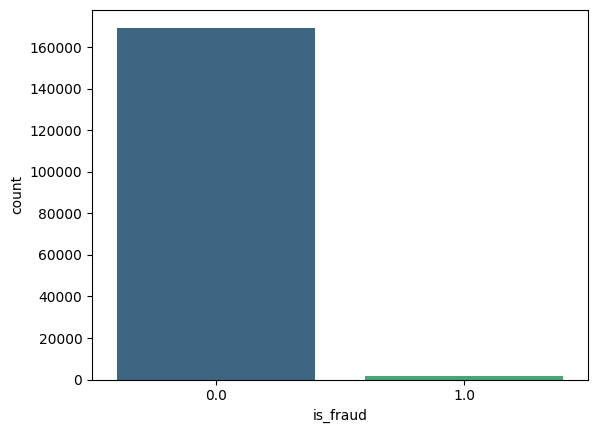

In [76]:
sns.countplot(x=df['is_fraud'],palette='viridis');

In [77]:
fraud = df["is_fraud"].value_counts()
print("Yes: ",fraud[1])
print("No: ",fraud[0])

Yes:  1505
No:  169343


In [78]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [79]:
df = df.dropna()

In [80]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [81]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

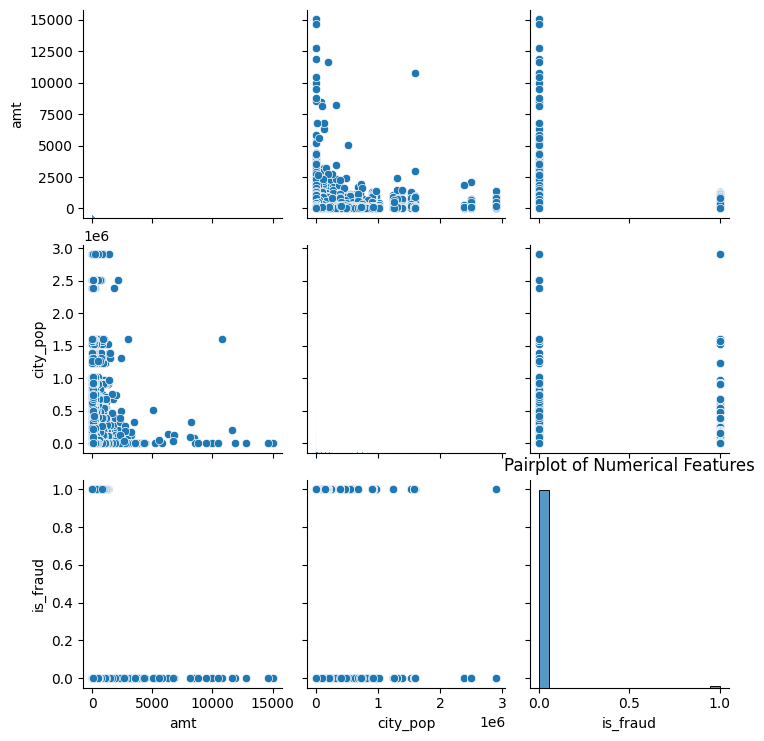

In [82]:
numerical_columns = ['amt','city_pop', 'gender', 'is_fraud']
numerical_data = df[numerical_columns]

# Creating pairplot
sns.pairplot(numerical_data)
plt.title('Pairplot of Numerical Features')
plt.show()

In [83]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

In [84]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['month'] = df['trans_date_trans_time'].dt.month
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,0,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,0,1


In [85]:
unique_transaction_count = len(df['trans_num'].unique())
print("Total count of unique transaction numbers:", unique_transaction_count)

Total count of unique transaction numbers: 170848


In [86]:
columns_to_drop = ['first', 'unix_time', 'dob', 'cc_num', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time']
df = df.drop(columns_to_drop, axis=1)
df.head(2)

,Unnamed: 0,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0.0,0,1
1,1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0.0,0,1


In [87]:
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170848 entries, 0 to 170847
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  170848 non-null  int64  
 1   merchant    170848 non-null  object 
 2   category    170848 non-null  object 
 3   amt         170848 non-null  float64
 4   last        170848 non-null  object 
 5   gender      170848 non-null  object 
 6   lat         170848 non-null  float64
 7   long        170848 non-null  float64
 8   city_pop    170848 non-null  int64  
 9   job         170848 non-null  object 
 10  merch_lat   170848 non-null  float64
 11  merch_long  170848 non-null  float64
 12  is_fraud    170848 non-null  float64
 13  hour        170848 non-null  int64  
 14  month       170848 non-null  int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 20.9+ MB


In [89]:
from category_encoders import WOEEncoder

In [90]:
!pip install category_encoders


In [91]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

# applying WOE encoding
for col in ['job','merchant', 'category', 'lat', 'last']:
    df[col] = WOEEncoder().fit_transform(df[col],df['is_fraud'])

In [92]:
x=df.drop('is_fraud',axis=1)
y=df['is_fraud']

In [93]:
x.head()

,Unnamed: 0,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,hour,month
0,0,1.201356,0.860054,4.97,-0.846527,0,36.0788,-81.1781,3495,0.540858,36.011293,-82.048315,0,1
1,1,0.550512,0.904792,107.23,0.890763,0,48.8878,-118.2105,149,-1.792896,49.159047,-118.186462,0,1
2,2,-0.057306,-0.840827,220.11,-2.086118,1,42.1808,-112.2620,4154,0.578682,43.150704,-112.154481,0,1
3,3,-0.442969,-0.126444,45.00,-2.176897,1,46.2306,-112.1138,1939,-1.089324,47.034331,-112.561071,0,1
4,4,0.562934,-0.497573,41.96,1.099979,1,38.4207,-79.4629,99,-0.905804,38.674999,-78.632459,0,1


In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,stratify=y)

In [95]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.05,random_state=0)
clean=iso.fit_predict(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [96]:
x_clean=x[clean==1]
y_clean=y[clean==1]

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_clean)
pd.DataFrame(x_scaled).describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,162305.000000,162305.000000,162305.000000,162305.000000,162305.000000,162305.000000,162305.000000,162305.000000,162305.000000,162305.000000,162305.000000,162305.000000,162305.000000,162305.000000
mean,0.502870,0.467108,0.434658,0.004062,0.215878,0.454428,0.576192,0.621047,0.020747,0.188191,0.570456,0.617029,0.558139,0.551363
std,0.286594,0.217043,0.322775,0.006951,0.110842,0.497920,0.196380,0.223362,0.071737,0.131355,0.182712,0.216028,0.294754,0.416188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256598,0.298741,0.232470,0.000568,0.129934,0.000000,0.423987,0.497447,0.000242,0.081284,0.432016,0.499735,0.304348,0.000000
50%,0.503989,0.457475,0.303452,0.003041,0.203652,0.000000,0.608688,0.666077,0.000793,0.147825,0.601613,0.656329,0.608696,0.500000
75%,0.750221,0.625253,0.653077,0.005345,0.291848,1.000000,0.709431,0.786862,0.006139,0.308415,0.697036,0.776799,0.826087,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_clean,random_state=4)
x_train.shape,x_test.shape

((121728, 14), (40577, 14))

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [100]:
dt=DecisionTreeClassifier(max_depth=4,min_samples_leaf=10,random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1)

In [101]:
predict_y = dt.predict(x_test)


In [102]:
dt.score(x_test,y_test)

0.9967469255982453

In [103]:
from sklearn.tree import plot_tree

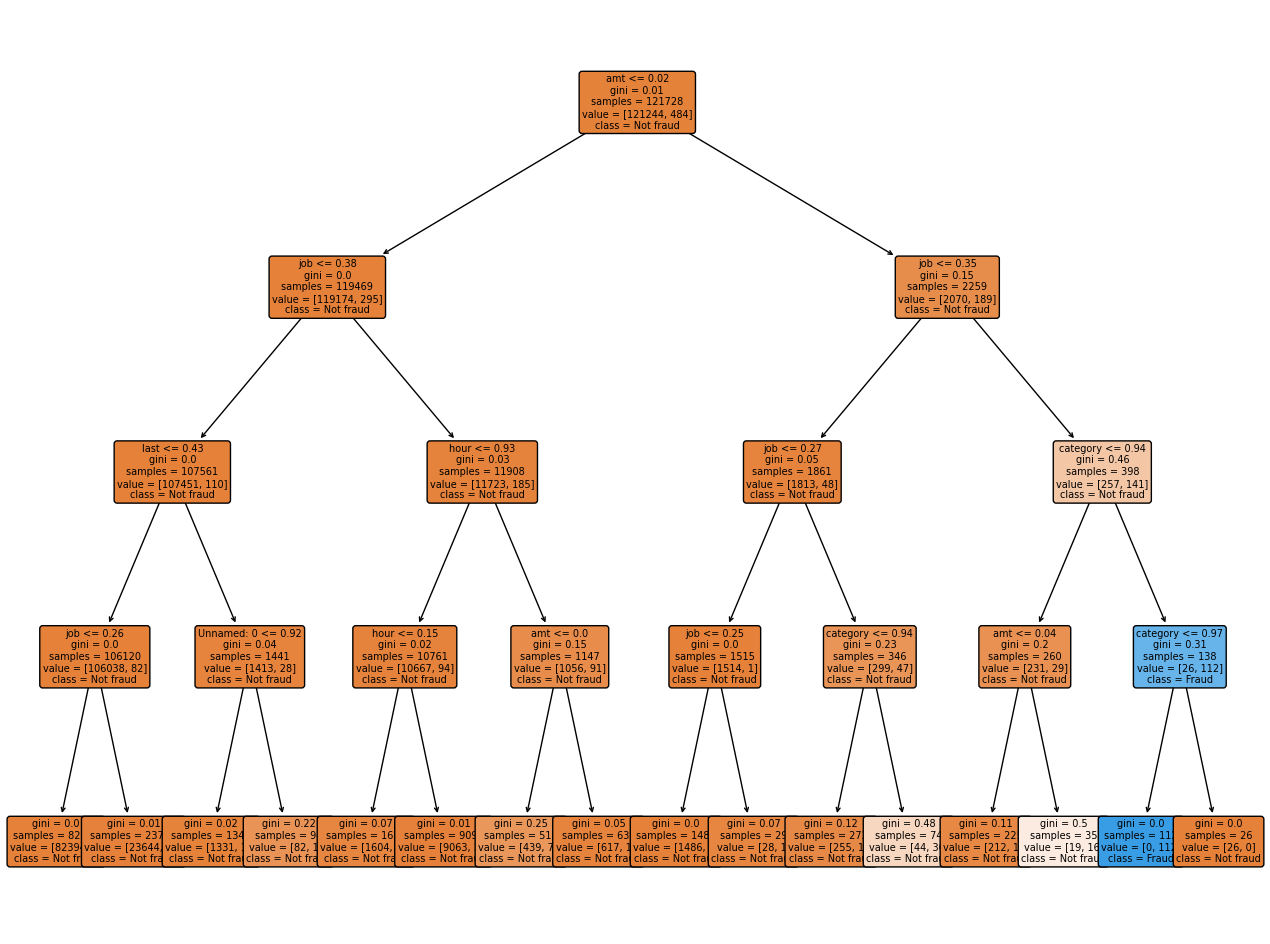

In [104]:
plt.figure(figsize=(16,12))
plot_tree(dt,fontsize=7,filled=True,class_names=['Not fraud','Fraud'],feature_names=x.columns,precision=2,rounded=True);

random forest


In [105]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

predict_y_rf = rf.predict(x_test)


In [106]:
rf.score(x_test,y_test)

0.9978312837321636

performance Evaluation

In [107]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [108]:
#decision tree

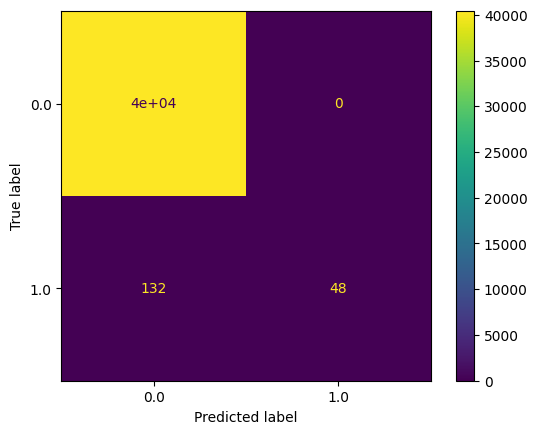

In [109]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_y);

In [110]:
confusion_matrix(y_test,predict_y)

array([[40397,     0],
       [  132,    48]])

In [111]:
#random forest

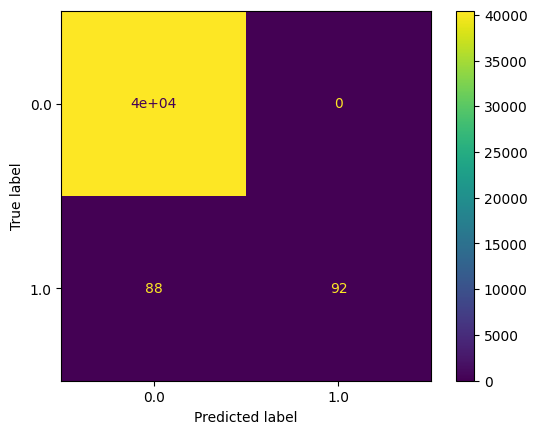

In [112]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_y_rf);

In [113]:
confusion_matrix(y_test,predict_y_rf)

array([[40397,     0],
       [   88,    92]])

In [113]:
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid = {
'max_depth': [None, 5, 10],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}


In [120]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [121]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [123]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.9976340721666557


In [124]:
tuned_dt_clf = grid_search.best_estimator_
tuned_dt_y_pred = tuned_dt_clf.predict(x_test)
tuned_dt_accuracy = accuracy_score(y_test, tuned_dt_y_pred)


In [125]:
print(f"Tuned Decision Tree Classifier accuracy: {tuned_dt_accuracy:.3f}")


Tuned Decision Tree Classifier accuracy: 0.998


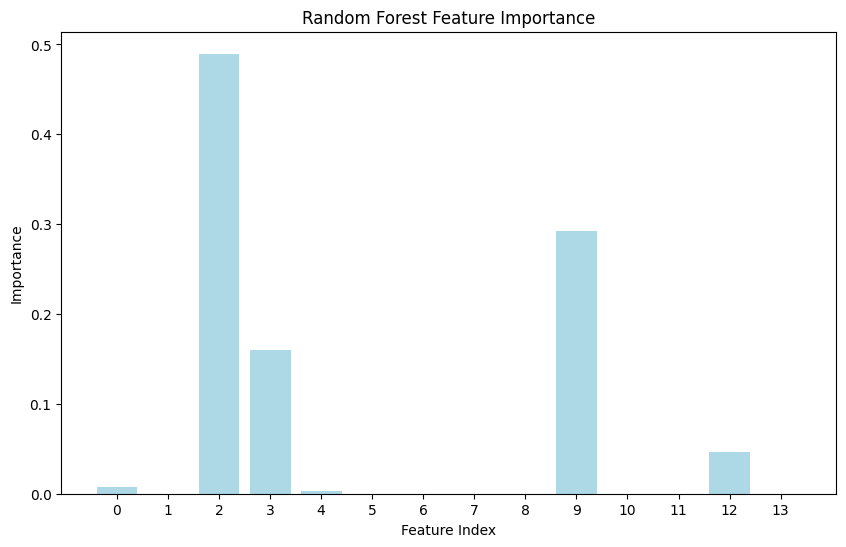

In [133]:
importances = dt.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), importances, color='lightblue', align='center')
plt.xticks(range(x_train.shape[1]), range(x_train.shape[1]))
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
dt_y_pred = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, predict_y)
dt_precision = precision_score(y_test, predict_y)
dt_recall = recall_score(y_test, predict_y)
dt_f1 = f1_score(y_test, predict_y)
print("Decision Tree Classifier metrics:")
print(f"Accuracy: {dt_accuracy:.3f}")
print(f"Precision: {dt_precision:.3f}")
print(f"Recall: {dt_recall:.3f}")
print(f"F1-score: {dt_f1:.3f}")


Decision Tree Classifier metrics:
Accuracy: 0.997
Precision: 1.000
Recall: 0.267
F1-score: 0.421


In [136]:

dt_y_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, predict_y_rf)
rf_precision = precision_score(y_test, predict_y_rf)
rf_recall = recall_score(y_test, predict_y_rf)
rf_f1 = f1_score(y_test, predict_y_rf)
print("Random forest Classifier metrics:")
print(f"Accuracy: {rf_accuracy:.3f}")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall: {rf_recall:.3f}")
print(f"F1-score: {rf_f1:.3f}")

Random forest Classifier metrics:
Accuracy: 0.998
Precision: 1.000
Recall: 0.511
F1-score: 0.676
